In [6]:
import pandas as pd

In [7]:
methods = [ 'Doc2Vec', 'RNN', 'LSTM', 'CNN', 'BERT', 'Distillation']

In [8]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr

def compute_pearson(df):
    actual = df['similarity']
    predicted = df['predicted_similarity']
    pearson_corr = pearsonr(actual, predicted).statistic
    return pearson_corr

def compute_spearman(df):
    actual = df['similarity']
    predicted = df['predicted_similarity']
    spearman_corr = spearmanr(actual, predicted).statistic
    return spearman_corr

def compute_mae(df):
    actual = df['similarity']
    predicted = df['predicted_similarity']
    mae = mean_absolute_error(actual, predicted)
    return mae

def compute_mse(df):
    actual = df['similarity']
    predicted = df['predicted_similarity']
    mse = mean_squared_error(actual, predicted)
    return mse


In [9]:
pearsons = []
spearmans = []
mae = []
mse = []

for method in methods:
    train_df = pd.read_csv(f'Methods/{method}/Results/train.csv')
    test_df = pd.read_csv(f'Methods/{method}/Results/test.csv')
    
    train_pearson = compute_pearson(train_df)
    train_spearman = compute_spearman(train_df)
    train_mae = compute_mae(train_df)
    train_mse = compute_mse(train_df)
    
    test_pearson = compute_pearson(test_df)
    test_spearman = compute_spearman(test_df)
    test_mae = compute_mae(test_df)
    test_mse = compute_mse(test_df)
    
    pearsons.append([method, train_pearson, test_pearson])
    spearmans.append([method, train_spearman, test_spearman])
    mae.append([method, train_mae, test_mae])
    mse.append([method, train_mse, test_mse])
    # print(train_pearson, train_spearman, train_mae, train_mse)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists to DataFrames
pearson_df = pd.DataFrame(pearsons, columns=['method', 'train', 'test'])
spearman_df = pd.DataFrame(spearmans, columns=['method', 'train', 'test'])
mae_df = pd.DataFrame(mae, columns=['method', 'train', 'test'])
mse_df = pd.DataFrame(mse, columns=['method', 'train', 'test'])

# Optional: melt for easier plotting with seaborn
def melt_df(df, metric_name):
    df_melted = df.melt(id_vars='method', value_vars=['train', 'test'],
                        var_name='split', value_name=metric_name)
    return df_melted

pearson_melted = melt_df(pearson_df, 'Pearson')
spearman_melted = melt_df(spearman_df, 'Spearman')
mae_melted = melt_df(mae_df, 'MAE')
mse_melted = melt_df(mse_df, 'MSE')


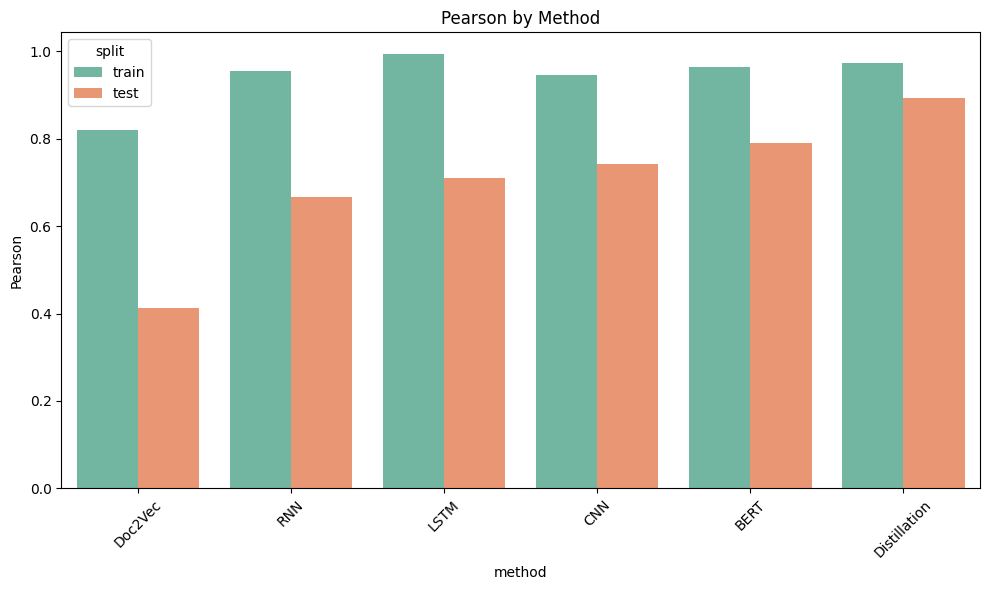

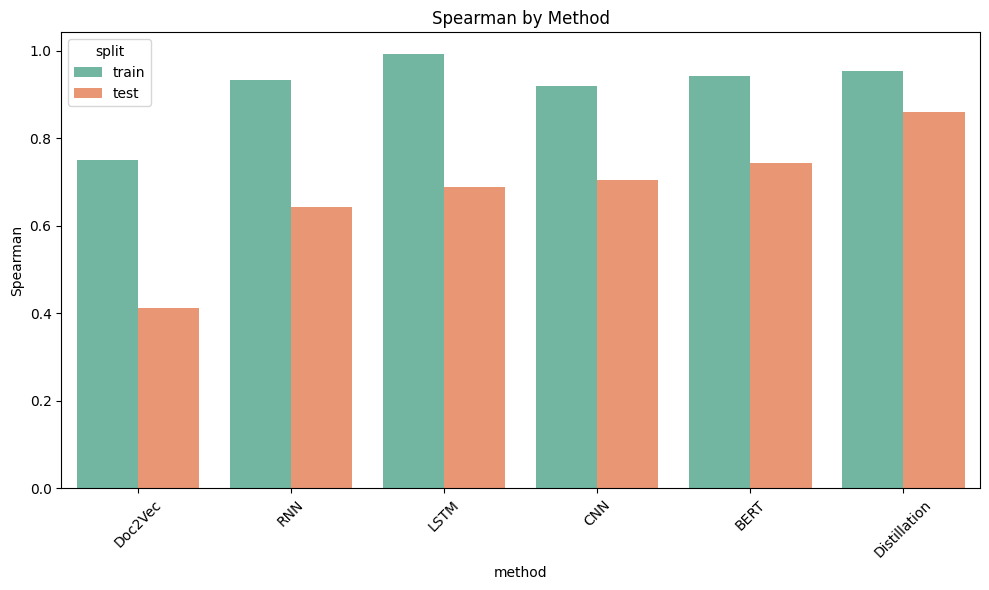

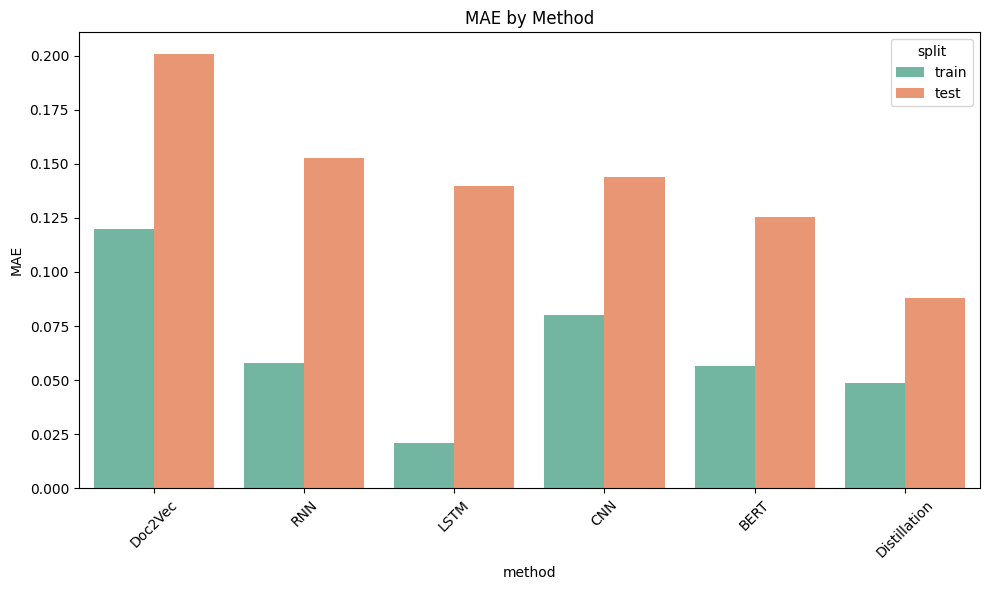

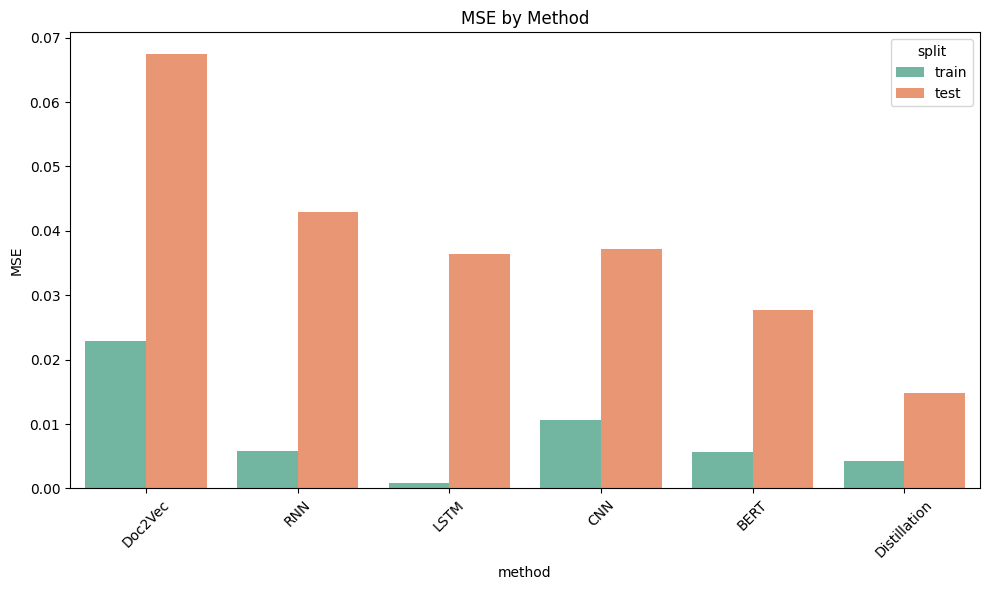

In [11]:
def plot_metric(melted_df, metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted_df, x='method', y=metric_name, hue='split', palette='Set2')
    plt.title(f'{metric_name} by Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_metric(pearson_melted, 'Pearson')
plot_metric(spearman_melted, 'Spearman')
plot_metric(mae_melted, 'MAE')
plot_metric(mse_melted, 'MSE')


In [12]:
pearson_df

,method,train,test
0,Doc2Vec,0.820401,0.412344
1,RNN,0.955988,0.666618
2,LSTM,0.993805,0.711291
3,CNN,0.944998,0.742326
4,BERT,0.963531,0.790293
5,Distillation,0.972751,0.894339


In [13]:
import pandas as pd

test_df_raw = pd.read_csv('./test.csv')

methods = [ 'Doc2Vec', 'RNN', 'LSTM', 'CNN', 'BERT', 'Distillation']
dfs = []

for model_names in methods:
    dfs.append(pd.read_csv(f'Methods/{model_names}/Results/test.csv'))

combined_df = pd.concat(
    [df['predicted_similarity'].reset_index(drop=True) for df in dfs],
    axis=1
)
combined_df.columns = methods

test_df = pd.concat(
    [test_df_raw, combined_df],
    axis=1
)

test_df.to_csv('Combined_results_test.csv')

test_df

,id,s1,s2,score,Doc2Vec,RNN,LSTM,CNN,BERT,Distillation
0,sick_test_822,A woman is talking to a man,A man is talking to a woman,0.90,0.731794,0.913445,0.852713,0.950129,0.974569,0.974719
1,sts_test_111,A man is putting garlic on some bread slices.,A man is sprinkling seasoning on several split...,0.40,0.361599,0.639946,0.778635,0.775935,0.691742,0.624588
2,sts_test_502,A bike is next to a couple women.,A child next to a bike.,0.40,0.249173,0.708850,0.764466,0.789641,0.765109,0.490211
3,sick_test_1253,A man is playing a bamboo flute,A flute is being played by the man,0.86,0.684309,0.957379,0.735184,0.996158,0.964099,0.922310
4,sick_test_1967,A woman on a rock is lying on a blanket and re...,A woman is rocking over a blanket lying on som...,0.54,0.688189,0.917402,0.729991,0.903650,0.946081,0.714596
...,...,...,...,...,...,...,...,...,...,...
3342,sick_test_1099,A woman is collecting tap water in a mug,There is no boy filling a pitcher with water,0.52,0.533981,0.239837,0.559423,0.613817,0.498875,0.440952
3343,sts_test_559,There is a cook preparing food.,A cook is making food.,1.00,0.600148,0.704321,0.897953,0.885129,0.987018,0.899492
3344,sick_test_1212,A young boy is playing a guitar,A boy is playing guitar,0.86,0.771333,0.983629,0.878593,0.973016,0.898162,0.957626
3345,sick_test_1101,"A dog, which is small, is playing on the green...","A dog is near a ball colored in red, which is ...",0.48,0.632322,0.635977,0.521849,0.801525,0.602705,0.605631
